<a href="https://colab.research.google.com/github/dravichi/CODSOFT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction - Codsoft Internship**

**Importing Essential Libraries**

In [2]:
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing Dataset**

In [4]:
files.upload()
df = pd.read_csv('advertising.csv')

Saving advertising.csv to advertising.csv


**Data Overview**

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.shape

(200, 4)

In [12]:
df.ndim

2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Data Visualization**

Text(0.5, 1.0, 'Sales and TV Advertising Relation')

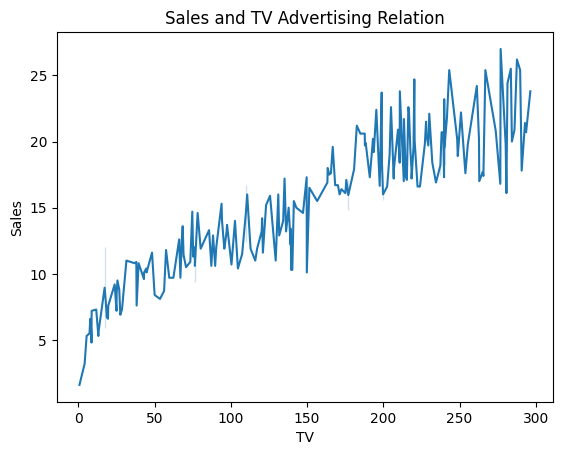

In [16]:
sns.lineplot(df, x="TV", y="Sales").set_title("Sales and TV Advertising Relation")

Text(0.5, 1.0, 'Sales and Radio Advertising Relation')

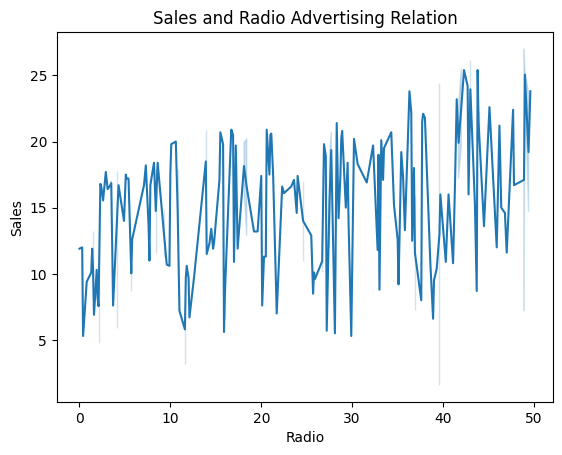

In [17]:
sns.lineplot(df, x="Radio", y="Sales").set_title("Sales and Radio Advertising Relation")

Text(0.5, 1.0, 'Sales and Newspaper Advertising Relation')

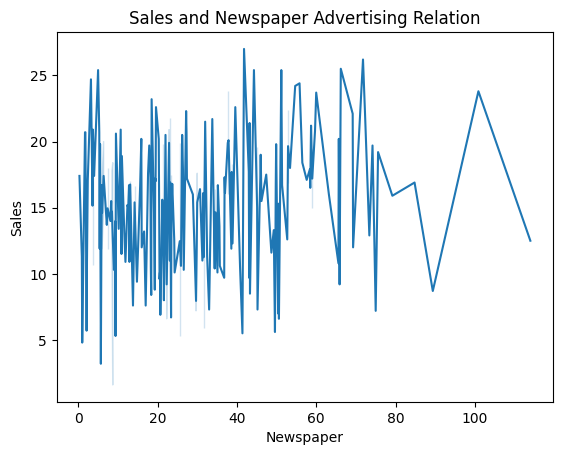

In [18]:
sns.lineplot(df, x="Newspaper", y="Sales").set_title("Sales and Newspaper Advertising Relation")

**Relation Between Numerical Variables**

Text(0.5, 1.0, 'Relation Between Numerical Variables')

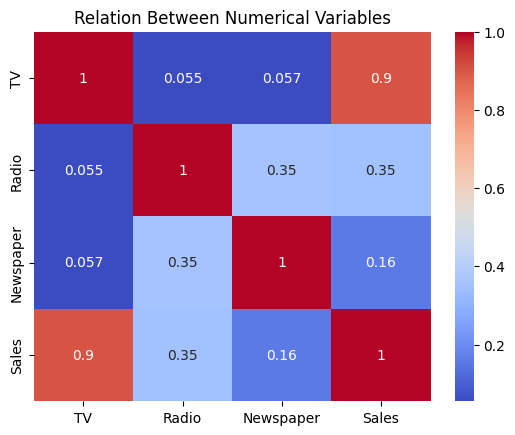

In [19]:
numerical = df.select_dtypes(include=['float64']).corr()
sns.heatmap(numerical, annot=True, cmap='coolwarm').set_title('Relation Between Numerical Variables')

**Splitting Dataset Into Training and Testing**

In [25]:
x = df[['TV']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Training Dataset**

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

**Model Evaluation**

In [27]:
print(f'R2 Score: {round(r2_score(y_test, y_pred)*100, 2)}%')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

R2 Score: 80.26%
Mean Squared Error: 6.101072906773963
Mean Absolute Error: 1.9502948931650088


[Text(0.5, 1.0, 'Actual vs Predicted Sales'),
 Text(0.5, 0, 'Actual Sales'),
 Text(0, 0.5, 'Predicted sales')]

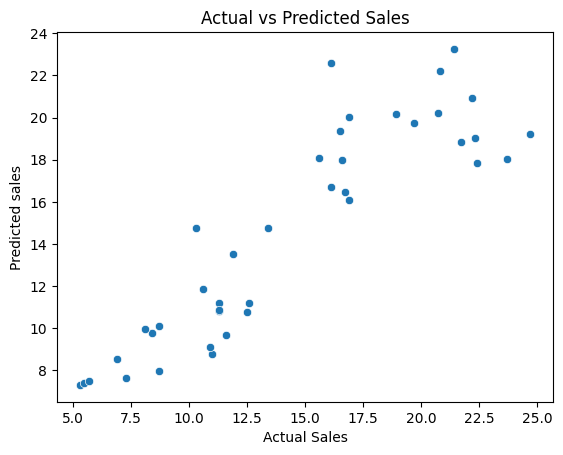

In [28]:
sns.scatterplot(x=y_test, y=y_pred).set(title='Actual vs Predicted Sales', xlabel='Actual Sales', ylabel='Predicted sales')